In [1]:
"""
Two-Body System Analysis
Investigating the central mass in Omega Centauri
"""

'\nTwo-Body System Analysis\nInvestigating the central mass in Omega Centauri\n'

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl
import two_body_utils 
import astropy.units as u
import astropy.constants as const
from astropy.table import Table
from datetime import datetime

In [3]:
"""
"""
#Single Orbital Plot
"""
#Calculate a single orbit
kes = pyasl.KeplerEllipse(a = two_body_utils.a, per= two_body_utils.per, e = two_body_utils.e[0], Omega= two_body_utils.Omega, 
                             i= two_body_utils.i, w=two_body_utils.w)

# Get a time axis
# np.linspace(start,stop,num)
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

# Calculate the orbit position at the given points in a Cartesian coordinate system.
pos = kes.xyzPos(t)

# Calculate the orbit radius 
radius = kes.radius(t)

# Calculate velocity on orbit
vel = kes.xyzVel(t)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = kes.xyzNodes_LOSZ()
# Plot x and y coordinates of the orbit
plt.subplot(2, 1, 1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::, 1], pos[::, 0], 'bp')
# Point of periapsis
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)
"""

'\n#Calculate a single orbit\nkes = pyasl.KeplerEllipse(a = two_body_utils.a, per= two_body_utils.per, e = two_body_utils.e[0], Omega= two_body_utils.Omega, \n                             i= two_body_utils.i, w=two_body_utils.w)\n\n# Get a time axis\n# np.linspace(start,stop,num)\nt = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400\n\n# Calculate the orbit position at the given points in a Cartesian coordinate system.\npos = kes.xyzPos(t)\n\n# Calculate the orbit radius \nradius = kes.radius(t)\n\n# Calculate velocity on orbit\nvel = kes.xyzVel(t)\n\n# Find the nodes of the orbit (Observer at -z)\nascn, descn = kes.xyzNodes_LOSZ()\n# Plot x and y coordinates of the orbit\nplt.subplot(2, 1, 1)\nplt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")\nplt.xlabel("East ->")\nplt.ylabel("North ->")\nplt.plot([0], [0], \'k+\', markersize=9)\nplt.plot(pos[::, 1], pos[::, 0], \'bp\')\n# Point of periapsis\nplt.plot([pos[0, 1]],

In [4]:
"""
"""
#Single Binary Orbit Plots
"""
# Calculate a single binary orbit
bo = pyasl.BinaryOrbit(two_body_utils.m2m1, two_body_utils.mtot, two_body_utils.per, two_body_utils.e[0], 
                       two_body_utils.tau, two_body_utils.Omega, two_body_utils.w, two_body_utils.i)

# Get a time axis
# np.linspace(start,stop,num)
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

# Calculate primary and secondary orbit
ke1 = bo.getKeplerEllipse_primary()
ke2 = bo.getKeplerEllipse_secondary()

# velocities and radii of single orbit
r1s, r2s = bo.xyzPos(t)
v1s, v2s = bo.xyzVel(t)

# Relative distance of masses (centers) of single orbit
rds = np.sqrt(np.sum((r1s-r2s)**2, axis=1))

#Plot binary orbit
plt.subplot(2,1,1)
plt.plot(r1s[::,0], r1s[::,1], 'b.-', label="Primary orbit")
plt.plot(r2s[::,0], r2s[::,1], 'r.-', label="Secondary orbit")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()
print()
print()

#Plot relative distances
plt.subplot(2,1,2)
plt.plot(t/86400, rds, 'b.-', label="Relative distance")
plt.axvline(two_body_utils.tau, ls=':', c='k', label="Time of periastron")
plt.xlabel("Time [days]")
plt.ylabel("Relative Distance [m]")
plt.legend()
plt.show()
print()
print()

# plot x-velocity
plt.subplot(3,1,1)
plt.plot(t/86400, v1s[::,0]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2s[::,0]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vx [km/s]")
plt.legend()
plt.show()
print()

# plot y-velocity
plt.subplot(3,1,2)
plt.plot(t/86400, v1s[::,1]/1e3, 'b.-', label="Primary")
plt.plot(t/86400, v2s[::,1]/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("vy [km/s]")
plt.legend()
plt.show()
print()

# plot orbit velocities
plt.subplot(3,1,3)
ov1s = np.sqrt(np.sum(v1s**2, axis=1))
ov2s = np.sqrt(np.sum(v2s**2, axis=1))
plt.plot(t/86400, ov1s/1e3, 'b.-', label="Primary")
plt.plot(t/86400, ov2s/1e3, 'r.-', label="Secondary")
plt.xlabel("Time [days]")
plt.ylabel("XYZ Orbit velocity [km/s]")
plt.legend()
plt.show()
"""

'\n# Calculate a single binary orbit\nbo = pyasl.BinaryOrbit(two_body_utils.m2m1, two_body_utils.mtot, two_body_utils.per, two_body_utils.e[0], \n                       two_body_utils.tau, two_body_utils.Omega, two_body_utils.w, two_body_utils.i)\n\n# Get a time axis\n# np.linspace(start,stop,num)\nt = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400\n\n# Calculate primary and secondary orbit\nke1 = bo.getKeplerEllipse_primary()\nke2 = bo.getKeplerEllipse_secondary()\n\n# velocities and radii of single orbit\nr1s, r2s = bo.xyzPos(t)\nv1s, v2s = bo.xyzVel(t)\n\n# Relative distance of masses (centers) of single orbit\nrds = np.sqrt(np.sum((r1s-r2s)**2, axis=1))\n\n#Plot binary orbit\nplt.subplot(2,1,1)\nplt.plot(r1s[::,0], r1s[::,1], \'b.-\', label="Primary orbit")\nplt.plot(r2s[::,0], r2s[::,1], \'r.-\', label="Secondary orbit")\nplt.xlabel("x [m]")\nplt.ylabel("y [m]")\nplt.legend()\nplt.show()\nprint()\nprint()\n\n#Plot relative distances\nplt.subplot(

In [52]:
"""
Binary System Calculations
"""

#Solver for Kepler's equation
# Solves Kepler's Equation for a set
# of mean anomaly and eccentricity.
ks = pyasl.MarkleyKESolver()
print("Eccentric anomaly: \n",ks.getE(two_body_utils.M, two_body_utils.e))

# Initialize empty arrays 
positions = np.zeros((len(two_body_utils.e), 3))  
velocities = np.zeros((len(two_body_utils.e), 3))  
radii = np.zeros((len(two_body_utils.e), 3))

# Get a time axis
# np.linspace(start,stop,num)
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

# Loop over each eccentricity and calculate position, velocity, radius, and the nodes of the orbit (Observer at -z)
for i, e in enumerate(two_body_utils.e):
    # Calculate the ellipse for each value of eccentricity
    ke = pyasl.KeplerEllipse(a = two_body_utils.a, per= two_body_utils.per, e = two_body_utils.e[i], Omega= two_body_utils.Omega, 
                             i= two_body_utils.i, w=two_body_utils.w)

    for j, time_point in enumerate(t):
        # Calculate position, velocity, radius, and the nodes of the orbit at the current time
        positions[j] = ke.xyzPos(time_point)  
        velocities[j] = ke.xyzVel(time_point)  
        radii[j] = ke.radius(time_point)  
        
print("\nShape of output array: ", positions.shape)
print("x, y, z for the",two_body_utils.n_int,"points: ", positions[:two_body_utils.n_int, :: ])


Eccentric anomaly: 
 [1.14720736 1.6682787  1.65815565 1.15989498 1.24379971 1.46773996
 1.62109398 0.88753784 1.2135765  1.21267798]

Shape of output array:  (10, 3)
x, y, z for the 10 points:  [[ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01 -1.17639795e-10 -0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]
 [ 5.05980447e-01  0.00000000e+00  0.00000000e+00]]


In [60]:
"""
Binary Orbit Calculations
"""

# Binary orbit time intervals
# Arguments go as start, stop, number of intervals
# Input time in seconds
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

# Initialize empty arrays 
# Calculate positions and velocities
r1 = np.zeros((len(two_body_utils.e), 3))
r2 = np.zeros((len(two_body_utils.e), 3))
v1 = np.zeros((len(two_body_utils.e), 3))  
v2 = np.zeros((len(two_body_utils.e), 3))  

# Get a time axis
# np.linspace(start,stop,num)
t = np.linspace(two_body_utils.tau, two_body_utils.per, two_body_utils.n_int) * 86400

# Loop over each eccentricity and calculate position, velocity, radius, and the nodes of the orbit (Observer at -z)
for i, e in enumerate(two_body_utils.e):
    # Calculate binary orbit for each value of eccentricity
    bo = pyasl.BinaryOrbit(two_body_utils.m2m1, two_body_utils.mtot, two_body_utils.per, two_body_utils.e[i], 
                       two_body_utils.tau, two_body_utils.Omega, two_body_utils.w, two_body_utils.i)

    for j, time_point in enumerate(t):
        # Calculate positions and velocities of the two orbits
        r1[j],r2[j] = bo.xyzPos(time_point)  
        v1[j],v2[j]= bo.xyzVel(time_point)  

#Velocities in XY
v1_xy = np.linalg.norm(v1[:, :2], axis=1)                   
v2_xy = np.linalg.norm(v2[:, :2], axis=1)
     
# Relative distance of masses (centers)
rd = np.sqrt(np.sum((r1-r2)**2, axis=1))
r1

array([[ 1.95542612,  0.        ,  0.        ],
       [-0.32637295,  3.06535373,  0.        ],
       [-3.04296505,  3.21225641,  0.        ],
       [-4.81195734,  2.21826839,  0.        ],
       [-5.66819232,  0.78025056,  0.        ],
       [-5.66819232, -0.78025056, -0.        ],
       [-4.81195734, -2.21826839, -0.        ],
       [-3.04296505, -3.21225641, -0.        ],
       [-0.32637295, -3.06535373, -0.        ],
       [ 1.95542612,  0.        ,  0.        ]])

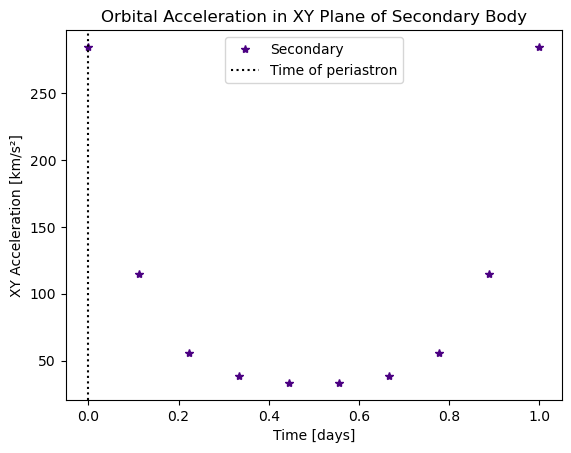

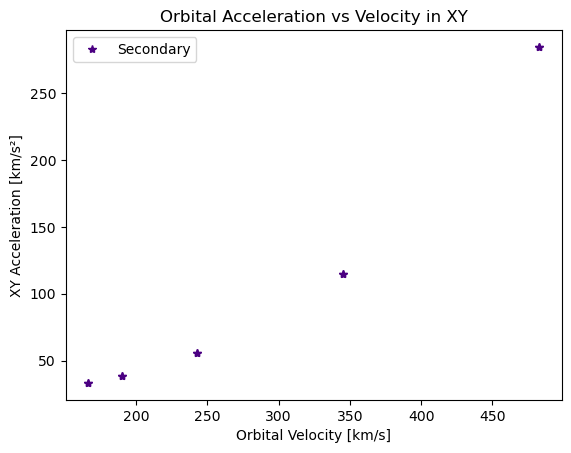

In [7]:
"""
Acceleration Plots of the Secondary Body
"""
# Calculate the xy acceleration of the secondary body
a_xy_secondary = two_body_utils.xy_orbital_acceleration_secondary(rd=rd)

# Plot xy orbital acceleration vs time of the secondary body 
plt.plot(t / 86400, a_xy_secondary, '*', label="Secondary", color = "indigo")
plt.xlabel("Time [days]")
plt.ylabel("XY Acceleration [km/s²]")
plt.title("Orbital Acceleration in XY Plane of Secondary Body")
plt.axvline(two_body_utils.tau, ls=':', c='k', label="Time of periastron")
plt.legend()
plt.show()

# Plot xy orbital acceleration vs xy orbital velocity of the secondary body 
plt.plot( v2_xy/1e3, a_xy_secondary, '*', label="Secondary", color = "indigo")
plt.xlabel("Orbital Velocity [km/s]")
plt.ylabel("XY Acceleration [km/s²]")
plt.title("Orbital Acceleration vs Velocity in XY")
plt.legend()
plt.show()

In [8]:
"""
Observed 2D Velocities and Accelerations 
From high-velocity stars in Omega Centauri
"""

# 2d velocities:
# Measured v2D A: (113.0±1.1) km s−1 B: (66.6±4.1) km s−1 C: (94.9±1.7) km s−1 D: (77.9±2.0) km s−1 E: (69.6±0.8) km s−1 F: (67.4±0.4) km s−1 G: (66.2±1.9) km s−1
v2D = np.array([113.0, 66.6, 94.9, 77.9, 69.6, 67.4, 66.2])*u.km/u.s
v2D_err = np.array([1.1, 4.1, 1.7, 2.0, 0.8, 0.4, 1.9])*u.km/u.s

# Acceleration R.A. [mas/yr^2] -0.0069±0.0083 (0.8σ) 0.0702±0.0239 (2.9σ) 0.0028±0.0333 (0.1σ) 0.0357±0.0177 (2.0σ) 0.0072±0.0042 (1.7σ) 0.0052±0.0038 (1.4σ)  -0.0197±0.0267 (0.7σ)
a_ra = (np.array([-0.0069, 0.0702, 0.0028, 0.0357, 0.0072, 0.0052, -0.0197]))*u.mas/u.yr**2
a_ra_err = (np.array([0.0083, 0.0239, 0.0333, 0.0177, 0.0042, 0.0038, 0.0267])) *u.mas/u.yr**2

# Acceleration Dec. [mas/yr^2] 0.0085±0.0098 (0.9σ) 0.0228±0.0157 (1.5σ) -0.0060±0.0123 (0.5σ) -0.0194±0.0162 (1.2σ) -0.0009±0.0075 (0.1σ) -0.0015±0.0038 (0.4σ) 0.0173±0.0170 (1.0σ)
a_dec = (np.array([0.0085, 0.0228, -0.0060, -0.0194, -0.0009, -0.0015, 0.0173]))*u.mas/u.yr**2
a_dec_err = (np.array([0.0098, 0.0157, 0.0123, 0.0162, 0.0075, 0.0038, 0.0170]))*u.mas/u.yr**2

# Acceleration in the plane of the sky [km/s^2]
#a_total = two_body_utils.masyr2_to_kms2((np.sqrt(a_ra**2 + a_dec**2)), distance_km = 1*u.km)
#a_total_err = two_body_utils.masyr2_to_kms2((np.sqrt((a_ra * a_ra_err / a_total)**2 + (a_dec * a_dec_err / a_total)**2)), distance_km = 1*u.km)

# Total angular acceleration and in mas/yr²
a_total_masyr2 = np.sqrt(a_ra**2 + a_dec**2)

# Propagate error in mas/yr²
a_total_masyr2_err = np.sqrt((a_ra * a_ra_err / a_total_masyr2)**2 + (a_dec * a_dec_err / a_total_masyr2)**2)

# Conversion to km/s²
a_total = two_body_utils.masyr2_to_kms2(a_masyr2 = a_total_masyr2, distance_km = two_body_utils.distance_km)
a_total_err = two_body_utils.masyr2_to_kms2(a_masyr2 = a_total_masyr2_err, distance_km = two_body_utils.distance_km)


In [24]:
"""
Data Table for Omega Centauri Stars
"""
star_data = Table(
    {
        "v2D": v2D,
        "v2D_err": v2D_err,
        "a_ra": a_ra,
        "a_ra_err": a_ra_err,
        "a_dec": a_dec,
        "a_dec_err": a_dec_err,
        "a_total": a_total,
        "a_total_err": a_total_err,
    }
)
star_data

v2D,v2D_err,a_ra,a_ra_err,a_dec,a_dec_err,a_total,a_total_err
km / s,km / s,mas / yr2,mas / yr2,mas / yr2,mas / yr2,km / s2,km / s2
float64,float64,float64,float64,float64,float64,float64,float64
113.0,1.1,-0.0069,0.0083,0.0085,0.0098,8.930061383293236e-09,7.531455373299496e-09
66.6,4.1,0.0702,0.0239,0.0228,0.0157,6.02047938832453e-08,1.8958529783912896e-08
94.9,1.7,0.0028,0.0333,-0.006,0.0123,5.400731419743836e-09,1.4649029465648002e-08
77.9,2.0,0.0357,0.0177,-0.0194,0.0162,3.314142014778814e-08,1.4167818247443028e-08
69.6,0.8,0.0072,0.0042,-0.0009,0.0075,5.918566003817241e-09,3.483038561817065e-09
67.4,0.4,0.0052,0.0038,-0.0015,0.0038,4.4144539757184885e-09,3.0995661122692196e-09
66.2,1.9,-0.0197,0.0267,0.0173,0.017,2.1385320005943142e-08,1.8748565257835362e-08


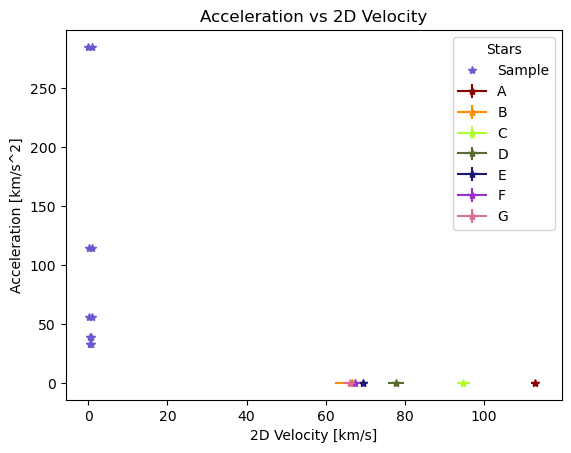

In [36]:
"""
Plot of Accelleration vs 2D Velocities of Omega Centauri Stars
"""
# Plot acceleration [km/s^2] vs 2D velocities [km/s]
plt.xlabel("2D Velocity [km/s]")
plt.ylabel("Acceleration [km/s^2]")
plt.title("Acceleration vs 2D Velocity")
colours = ["darkred", "darkorange", "greenyellow", "darkolivegreen", "midnightblue", "darkorchid", "palevioletred"]
labels = ["A", "B", "C", "D", "E", "F", "G"]
for i in range(len(colours)):
    plt.errorbar(
        x=v2D[i],
        y=a_total[i],
        yerr=a_total_err[i],
        xerr =v2D_err[i],
        marker="*",
        label=labels[i],
        color=colours[i],
    )
plt.plot(t / 86400, a_xy_secondary, '*', label="Sample", color = "slateblue")
plt.legend(title='Stars')


# Generate timestamped named file
plot_name = "Acceleration vs 2D Velocity "
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = rf"C:\Users\macke\OneDrive - Saint Marys University\Summer Research 2025\Plots\{plot_name}{timestamp}.png"

# Save and show the plot
# plt.savefig(filename)
plt.show()

In [11]:
"""
Using some functions
"""
e = two_body_utils.e
E = two_body_utils.eccentric_annomaly(e = e)
nu = two_body_utils.true_anomaly(E = E, e = e)
r = two_body_utils.relative_distance(e = e, nu = nu)
a2_xy = two_body_utils.xy_orbital_acceleration_secondary(rd=r)

